<a href="https://colab.research.google.com/github/Arunmangalathsebastian/python-fiels/blob/main/ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ising Model using metropolis algorithum

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit
import mpl_toolkits
from scipy.ndimage import convolve, generate_binary_structure

In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
N = 10

In [ ]:
lattice = 2*np.random.randint(2, size=(N,N))-1

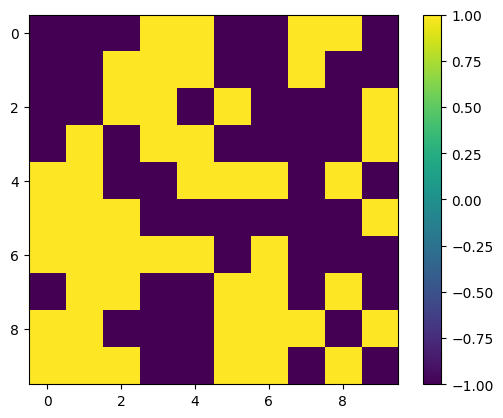

In [ ]:
plt.imshow(lattice)
plt.colorbar()

Energy , $\frac{E}{J} = -\sum_{<i,j>}σ_iσ_j$

In [ ]:
def get_energy(lattice):
  E = 0
  for i in np.arange(len(lattice)-1):
    for j in np.arange(len(lattice)-1):
      E += -lattice[i,j]*(lattice[(i+1),j] + lattice[(i-1),j] + lattice[i,(j+1)] + lattice[i, (j-1)])
  return E

In [ ]:

def plot_spin_3d(spin_lattice, N):
    fig = plt.figure(figsize=(N/2, N/2))
    ax = fig.add_subplot(projection='3d')

    N = spin_lattice.shape[0]
    arrow_length = 0.5 / N
    for i in range(N):
        for j in range(N):
            if spin_lattice[i, j] == 1:
                ax.quiver(i, j, 0, 0, arrow_length, 1, color='r', length=0.2, arrow_length_ratio=0.4)
            else:
                ax.quiver(i, j, 0, 0, -arrow_length, -1, color='b', length=0.2, arrow_length_ratio=0.4)

    # Add grid lines
    for i in range(N):
        ax.plot([i, i], [0, N-1], [0, 0], color='black', lw=1)
        ax.plot([0, N-1], [i, i], [0, 0], color='black', lw=1)
    ax.axis("OFF")
    ax.set_xlim([0, N])
    ax.set_ylim([0, N])
    ax.set_zlim([-1, 1])
    plt.show()


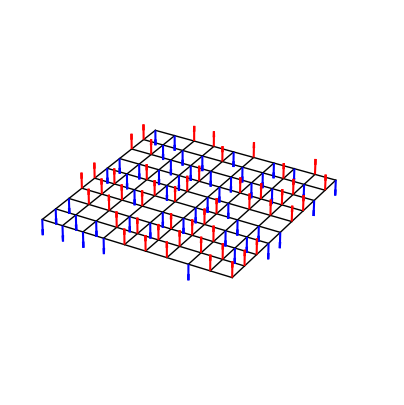

In [ ]:
plot_spin_3d(lattice, N)

In [ ]:
def metropolis(lattice, times, Bj, energy):

  lattice_copy = lattice.copy()
  net_spin = np.zeros(times-1)
  net_energy = np.zeros(times-1)

  for t in np.arange(0,times-1):
    #E0 = 0
    #Et = 0
    x = np.random.randint(0, N)
    y = np.random.randint(0, N)
    spin_i = lattice[x,y]
    spin_f = spin_i*-1
    E0 = -spin_i*(lattice[(x+1)%N,y] + lattice[(x-1)%N,y] + lattice[x,(y+1)%N] + lattice[x,(y-1)%N])
    Et = -spin_f*(lattice[(x+1)%N,y] + lattice[(x-1)%N,y] + lattice[x,(y+1)%N] + lattice[x,(y-1)%N])
    dE = Et - E0
    if (dE>0)*(np.random.random() < np.exp(-Bj*dE)):
      lattice_copy[x,y]=spin_f
      energy += dE
    elif (dE<=0):
      lattice_copy[x,y] = spin_f
      energy+=dE

    net_spin[t] = lattice_copy.sum()
    net_energy[t] = energy

  return net_spin, net_energy

In [ ]:
spins, net_energy = metropolis(lattice, 1000000, 0.7, get_energy(lattice))

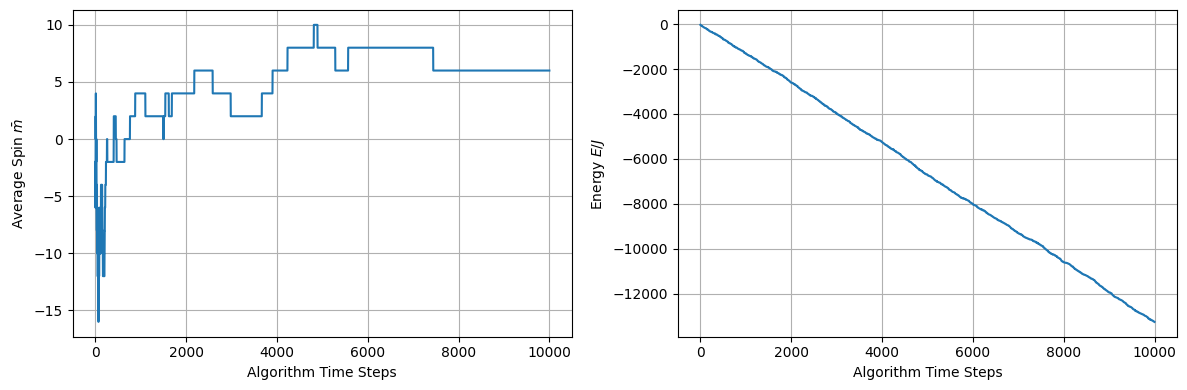

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(spins)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(net_energy)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
#fig.suptitle(r'Evolution of Average Spin and Energy for $\beta J=$0.7', y=0.7, size=18)
plt.show()

In [ ]:
init_random = np.random.random((N,N))
lattice_n = np.zeros((N, N))
lattice_n[init_random>=0.75] = 1
lattice_n[init_random<0.75] = -1

init_random = np.random.random((N,N))
lattice_p = np.zeros((N, N))
lattice_p[init_random>=0.25] = 1
lattice_p[init_random<0.25] = -1

In [ ]:
def get_spin_energy(lattice, BJs):
    ms = np.zeros(len(BJs))
    E_means = np.zeros(len(BJs))
    E_stds = np.zeros(len(BJs))
    for i, bj in enumerate(BJs):
        spins, energies = metropolis(lattice, 10000, bj, get_energy(lattice))
        ms[i] = spins[-100:].mean()
        E_means[i] = energies[-100:].mean()
        E_stds[i] = energies[-100:].std()
    return ms, E_means, E_stds

BJs = np.arange(0.1, 2, 0.05)
ms_n, E_means_n, E_stds_n = get_spin_energy(lattice, BJs)

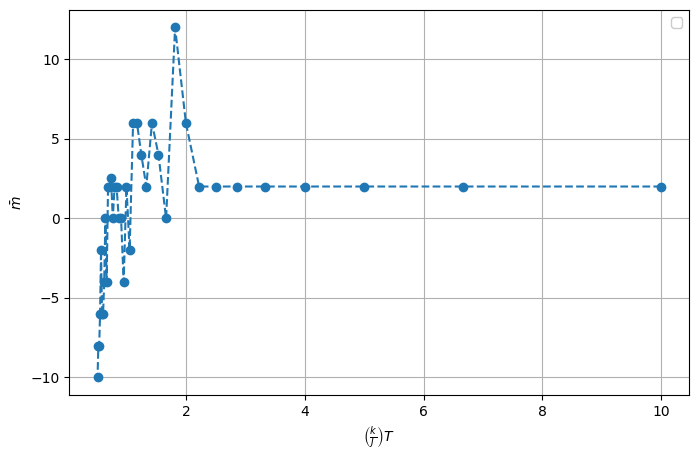

In [ ]:
plt.figure(figsize=(8,5))
plt.grid()
plt.plot(1/BJs, ms_n, 'o--')
plt.xlabel(r'$\left(\frac{k}{J}\right)T$')
plt.ylabel(r'$\bar{m}$')
plt.legend(facecolor='white', framealpha=1)
plt.show()

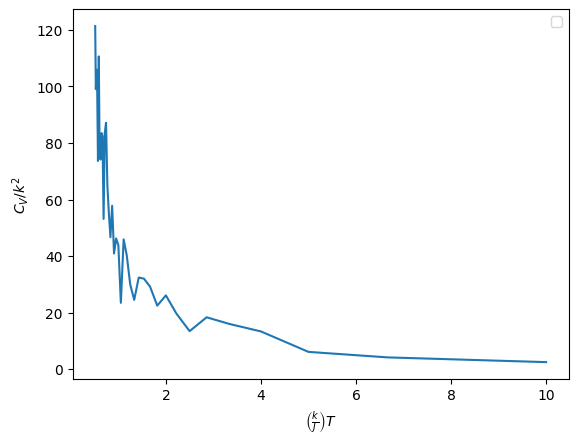

In [ ]:
plt.plot(1/BJs, E_stds_n*BJs)
plt.xlabel(r'$\left(\frac{k}{J}\right)T$')
plt.ylabel(r'$C_V / k^2$')
plt.legend()
plt.show()